In [82]:
pip install scikeras

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from google.colab import drive
from sklearn.compose import ColumnTransformer
from keras.layers import Dense,Dropout,BatchNormalization
from keras.utils import to_categorical,plot_model
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection  import cross_val_score,train_test_split,cross_val_predict
from keras.metrics import categorical_accuracy,Precision, Recall,F1Score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler, OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [84]:

# Montar o Google Drive
drive.mount('/content/drive')
caminho_arquivo = '/content/drive/MyDrive/Colab Notebooks/dadosConsumo.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:

dados = pd.read_csv(caminho_arquivo, sep=",")
dados.iloc[1:10, :]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


In [86]:
dados.shape

(398, 9)

In [87]:
campos = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
for campo in campos:
    print(f"Contagem de valores únicos para o campo '{campo}':")
    print(dados[campo].value_counts())
    print("----------------------------------------------------------")

Contagem de valores únicos para o campo 'mpg':
mpg
13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
31.9     1
16.9     1
18.2     1
22.3     1
44.0     1
Name: count, Length: 129, dtype: int64
----------------------------------------------------------
Contagem de valores únicos para o campo 'cylinders':
cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64
----------------------------------------------------------
Contagem de valores únicos para o campo 'displacement':
displacement
97.0     21
98.0     18
350.0    18
318.0    17
250.0    17
         ..
104.0     1
110.0     1
130.0     1
111.0     1
144.0     1
Name: count, Length: 82, dtype: int64
----------------------------------------------------------
Contagem de valores únicos para o campo 'horsepower':
horsepower
150.0    22
90.00    20
88.00    19
110.0    18
100.0    17
         ..
61.00     1
93.00     1
148.0     1
152.0     1
82.00     1
Name: count, Length: 94, dtype: int64
----

In [88]:
dados['mpg'] = pd.to_numeric(dados['mpg'], errors='coerce').fillna(13.0)
dados['cylinders'] = pd.to_numeric(dados['cylinders'], errors='coerce').fillna(4)
dados['displacement'] = pd.to_numeric(dados['displacement'], errors='coerce').fillna(97.0)
dados['horsepower'] = pd.to_numeric(dados['horsepower'], errors='coerce').fillna(150.0)
dados['weight'] = pd.to_numeric(dados['weight'], errors='coerce').fillna(1985.0)
dados['acceleration'] = pd.to_numeric(dados['acceleration'], errors='coerce').fillna(14.5)
dados['model year'] = pd.to_numeric(dados['model year'], errors='coerce').fillna(73.0)
dados['origin'] = pd.to_numeric(dados['origin'], errors='coerce').fillna(1)

print(dados)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1            70       1      

In [89]:
dados.loc[32:,]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,150.0,2046.0,19.0,71,1,ford pinto
33,19.0,6,232.0,100.0,2634.0,13.0,71,1,amc gremlin
34,16.0,6,225.0,105.0,3439.0,15.5,71,1,plymouth satellite custom
35,17.0,6,250.0,100.0,3329.0,15.5,71,1,chevrolet chevelle malibu
36,19.0,6,250.0,88.0,3302.0,15.5,71,1,ford torino 500
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


A seguir, será feita uma verificação para ver se há valores NAN. Se tiver, serão trocados pela moda da coluna, ou seja, pelo valor que mais se repete.

In [90]:
valores = {
    'mpg': dados['mpg'].mode(),
    'cylinders': dados['cylinders'].mode(),
    'displacement': dados['displacement'].mode(),
    'horsepower': dados['horsepower'].mode(),
    'weight': dados['weight'].mode(),
    'acceleration': dados['acceleration'].mode(),
    'model year': dados['model year'].mode(),
    'origin': dados['origin'].mode()
}
dados= dados.fillna(value=valores)
print(dados.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  


Verifica-se se há valores muito fora do esperado, que podem ter sido inseridos devidos a erros de digitação. Para isso, são gerados boxplots, que mostram os outliers.

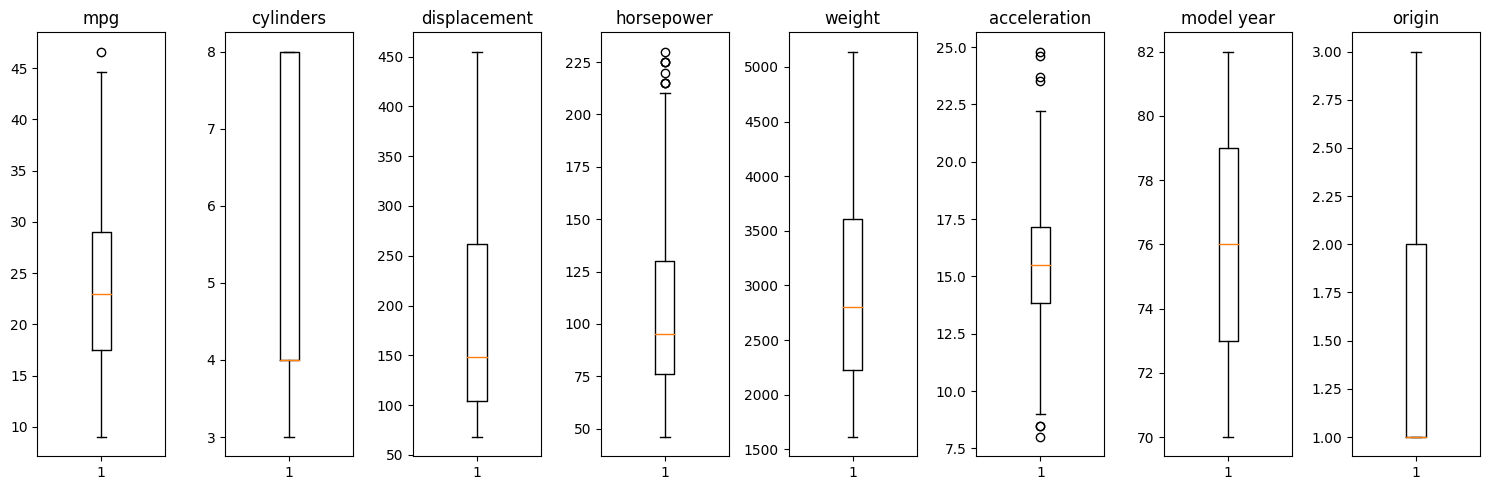

In [91]:
# Colunas que você deseja criar boxplots
colunas_boxplot = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

# Criar uma figura e eixos para os boxplots
fig, axs = plt.subplots(nrows=1, ncols=len(colunas_boxplot), figsize=(15, 5))
# Iterar sobre cada coluna desejada
for i, coluna in enumerate(colunas_boxplot):
    axs[i].boxplot(dados[coluna])
    axs[i].set_title(coluna)

# Exibir os boxplots
plt.tight_layout()
plt.show()

Não foram encontrados valores fora de uma faixa esperada

In [93]:
dados.loc[:,:]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [94]:
consumo = dados['mpg'].values
atributos = dados.drop(columns=['mpg']).values
print(consumo)

[18.  15.  18.  16.  17.  15.  14.  14.  14.  15.  15.  14.  15.  14.
 24.  22.  18.  21.  27.  26.  25.  24.  25.  26.  21.  10.  10.  11.
  9.  27.  28.  25.  25.  19.  16.  17.  19.  18.  14.  14.  14.  14.
 12.  13.  13.  18.  22.  19.  18.  23.  28.  30.  30.  31.  35.  27.
 26.  24.  25.  23.  20.  21.  13.  14.  15.  14.  17.  11.  13.  12.
 13.  19.  15.  13.  13.  14.  18.  22.  21.  26.  22.  28.  23.  28.
 27.  13.  14.  13.  14.  15.  12.  13.  13.  14.  13.  12.  13.  18.
 16.  18.  18.  23.  26.  11.  12.  13.  12.  18.  20.  21.  22.  18.
 19.  21.  26.  15.  16.  29.  24.  20.  19.  15.  24.  20.  11.  20.
 21.  19.  15.  31.  26.  32.  25.  16.  16.  18.  16.  13.  14.  14.
 14.  29.  26.  26.  31.  32.  28.  24.  26.  24.  26.  31.  19.  18.
 15.  15.  16.  15.  16.  14.  17.  16.  15.  18.  21.  20.  13.  29.
 23.  20.  23.  24.  25.  24.  18.  29.  19.  23.  23.  22.  25.  33.
 28.  25.  25.  26.  27.  17.5 16.  15.5 14.5 22.  22.  24.  22.5 29.
 24.5 29.  33.  20. 

In [95]:
atributos = np.nan_to_num(atributos)

In [96]:
# Identificar colunas com tipo de dado 'object' (não numérico)
colunas_objeto = dados.select_dtypes(include=['object']).columns

# Aplicar a codificação de etiquetas nessas colunas (fiz com for pois achei mais facil do que ficar simplesmente procurando as colunas que não são numericas, apenas outa maneira de se fazer)
labelencoder = LabelEncoder()

for coluna in colunas_objeto:
    dados[coluna] = labelencoder.fit_transform(dados[coluna])

dados.iloc[0:8,:]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,49
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,36
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,231
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,14
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,161
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,141
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,54
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,223


Apenas a última coluna não era numérica.

In [97]:
onehotencoder = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [8])],
                                  remainder='passthrough')

atributos = onehotencoder.fit_transform(dados)
atributos[0:5,:]

<5x313 sparse matrix of type '<class 'numpy.float64'>'
	with 45 stored elements in Compressed Sparse Row format>

In [98]:
atributos.shape

(398, 313)

In [99]:
regressor = Sequential()
regressor.add(Dense(units=512, activation='relu', input_dim=313))  # Ajuste o número de unidades e a dimensão de entrada para corresponder ao número de atributos
regressor.add(Dense(units=512, activation='relu'))
regressor.add(Dense(units=1, activation='linear'))
regressor.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error', 'mae', 'mse', 'mape', 'msle'])

#metricas adicionada:
#MAPE avalia a precisão de um modelo em fazer previsões
# MSLE metrica de erro usada para problemas de regressão onde a saída pode ter uma escala muito ampla

Epoch 1/900
2/2 [==============================] - 1s 271ms/step - loss: 195.4828 - mean_squared_error: 66450.0859 - mae: 195.4828 - mse: 66450.0859 - mape: 1013.2315 - msle: 9.4146 - val_loss: 345.5584 - val_mean_squared_error: 131814.7500 - val_mae: 345.5584 - val_mse: 131814.7500 - val_mape: 1831.4410 - val_msle: 7.8248
Epoch 2/900
2/2 [==============================] - 0s 42ms/step - loss: 276.9081 - mean_squared_error: 92835.1484 - mae: 276.9081 - mse: 92835.1484 - mape: 1447.3188 - msle: 6.5527 - val_loss: 82.3947 - val_mean_squared_error: 6993.6719 - val_mae: 82.3947 - val_mse: 6993.6719 - val_mape: 415.0773 - val_msle: 9.9345
Epoch 3/900
2/2 [==============================] - 0s 33ms/step - loss: 111.3567 - mean_squared_error: 14431.5742 - mae: 111.3567 - mse: 14431.5742 - mape: 560.4590 - msle: 10.0336 - val_loss: 135.5215 - val_mean_squared_error: 19229.7969 - val_mae: 135.5215 - val_mse: 19229.7969 - val_mape: 693.7879 - val_msle: 9.9345
Epoch 4/900
2/2 [====================

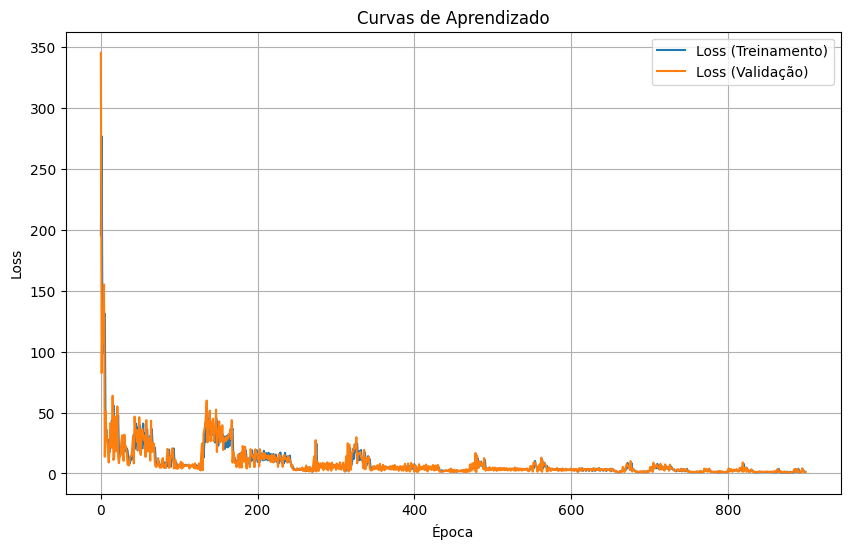

In [100]:
atributos_treino, atributos_validacao, consumo_treino, consumo_validacao = train_test_split(atributos, consumo, test_size=0.2, random_state=42)

# Treinar o modelo
history = regressor.fit(atributos_treino, consumo_treino, batch_size=200, epochs=900, validation_data=(atributos_validacao, consumo_validacao))

# Plotar as curvas de aprendizado
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Loss (Treinamento)')
plt.plot(history.history['val_loss'], label='Loss (Validação)')
plt.title('Curvas de Aprendizado')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [101]:
previsoes_validacao = regressor.predict(atributos_validacao).ravel()

# Calcular métricas
#média das diferenças absolutas entre as previsões do modelo e os valores reais. quanto menor melhor (notei nos meus teste q deram um erro absoluto ou seja não sei oque errei kkkkkkkk)
mae = mean_absolute_error(consumo_validacao, previsoes_validacao)
# média das diferenças quadráticas entre as previsões do modelo e os valores reais.
mse = mean_squared_error(consumo_validacao, previsoes_validacao)
# medida estatística que indica a proporção da variabilidade dos valores de resposta que é explicada pelo modelo.
r2 = r2_score(consumo_validacao, previsoes_validacao)

print("Erro Absoluto Médio (MAE):", mae)
print("Erro Quadrático Médio (MSE):", mse)
print("Coeficiente de Determinação (R²):", r2)

3/3 [==============================] - 0s 3ms/step
Erro Absoluto Médio (MAE): 1.1050824475288392
Erro Quadrático Médio (MSE): 1.9108245923081228
Coeficiente de Determinação (R²): 0.9644606475891736


In [102]:
previsoes = regressor.predict(atributos).ravel()

13/13 [==============================] - 0s 2ms/step


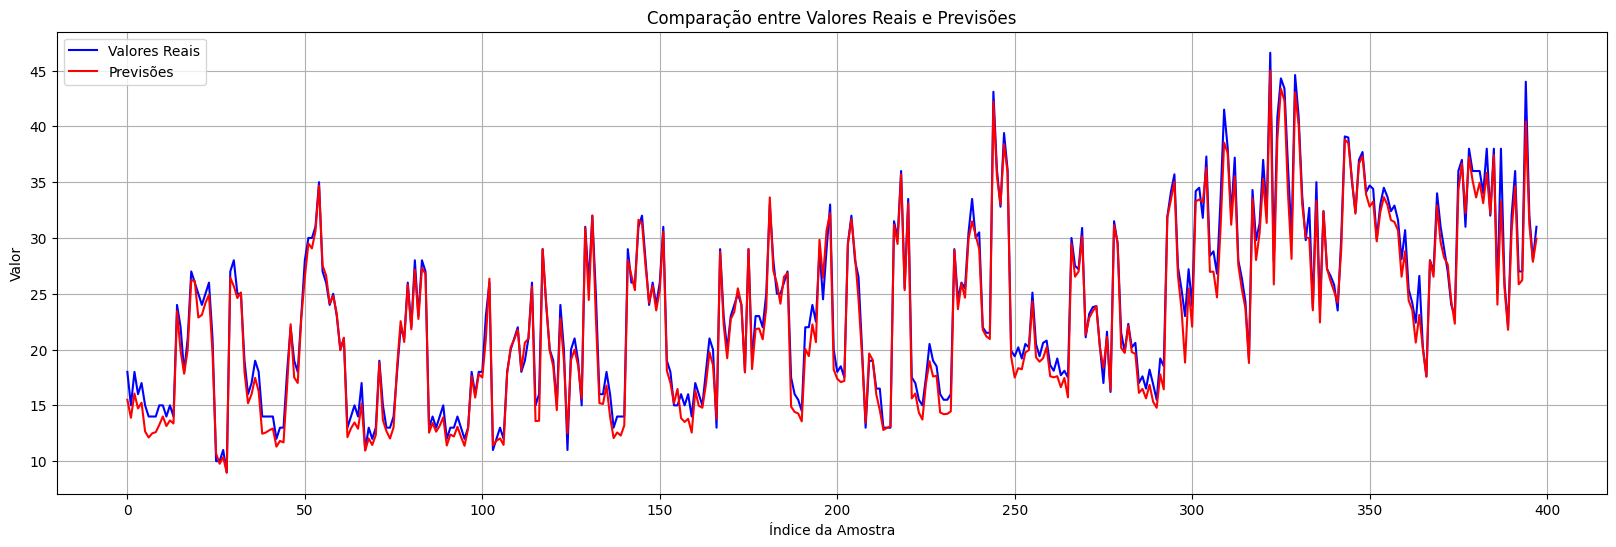

In [103]:
# basicamente coloquei um grafico para mostrar graficamente os resultados
# Criar um array com o número de amostras para o eixo x
amostras = range(398)

# Plotar previsões vs valores reais como linhas conectadas
plt.figure(figsize=(20, 6))
plt.plot(amostras, consumo[0:398], color='blue', label='Valores Reais')
plt.plot(amostras, previsoes[0:398], color='red', label='Previsões')
plt.xlabel('Índice da Amostra')
plt.ylabel('Valor')
plt.title('Comparação entre Valores Reais e Previsões')
plt.legend()
plt.grid(True)
plt.show()

A base de dados exigiu uma quantidade alta de épocas, mas obteve-se um bom resultado ao final.